Data gathered by I-LOFAR that is used to generate dynamic spectra is saved in beamlet statistics (BST) files. The following is a step by step look at some of the main aspects of the read_bst.py script. This script generates a quick look plot of dynamic spectra taken by I-LOFAR. read_bst.py has typically been used with [mode 357 observations](http://www.lofar-uk.org/wiki/uploads/Main/kaira_mode357_obs210413.pdf) and may require subtle changes for other observational modes.

The sample data used in this tutorial is of the sun on 02/09/17 and can be found [here](https://www.dropbox.com/sh/8i26audmr4pjrhv/AADGxOmB6fDbm9oJtXSYGdWta?dl=0) 

In [1]:
from pylab import figure,imshow,xlabel,ylabel,title,close,colorbar
import h5py
import datetime
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import dates
import sys
import struct
import os

In [2]:
#
# READ IN THE DATA
#

# path to data file
filepath='/home/pearse/Documents/Postgrad/Scripts-1/ILOFAR_Workshop/Test-data/'
filename = '20170902_103626_bst_00X.dat'
# observation frequencies - modify appropriately 
min_freq = 10
max_freq = 90

In [3]:
# extracting start time of observation from filename
start_time = datetime.datetime(int(filename[0:4]), int(filename[4:6]), int(filename[6:8]), int(filename[9:11]), int(filename[11:13]), int(filename[13:15]))

In [4]:
# Get the size of the file
filelen = os.path.getsize(filepath+filename)

In [5]:
# Get the number of values (each value is an 8-byte double)
rawdatalen = filelen/8

In [6]:
# Get the bit-mode -- mode 357 and full band observations are always 8 bit modes
bit_mode = 8
print("bit_mode =",bit_mode)

bit_mode = 8


In [7]:
# Calculate intermediate variables
num_beamlets = 244*16/bit_mode        # Determine the numger of beamlets
num_records = rawdatalen/num_beamlets # Determine the number of time samples we have
datalen = (rawdatalen/num_beamlets)*num_beamlets  # Use int division to clip off surplus
datastruct = str(int(datalen))+'d'         # Used by struct.unpack to work out how to load

In [8]:
# Open the data file
fp = open(filepath+filename, 'rb')

In [9]:
# Read the raw data from the file into a buffer
dataraw = struct.unpack(datastruct,fp.read(filelen))

In [10]:
# We don't need the file anymore, so close it
fp.close()

In [11]:
# re-organise the raw data into an array that is easy to plot
data_all = np.reshape(dataraw[:int(datalen)],(int(datalen/num_beamlets),int(num_beamlets)))
print(data_all.shape)

(29226, 488)


In [12]:
time_len  =data_all.shape[0]
#data = data_all[0:int(time_len/2.5), :]
data = data_all[:, :]

print(data.shape)

(29226, 488)


In [13]:
#normalizing frequency channel responses using median of values
for sb in range(data.shape[1]):
    data[:,sb] = data[:,sb]/np.median(data[:,sb])
#transposing the data for frequency vs. time format
data = np.transpose(data)


In [14]:
# calculating the end time
end_second = data.shape[1] # the last second is the same as the length of the time dimension
end_time = start_time + datetime.timedelta( seconds = end_second ) # add end_second to start_time

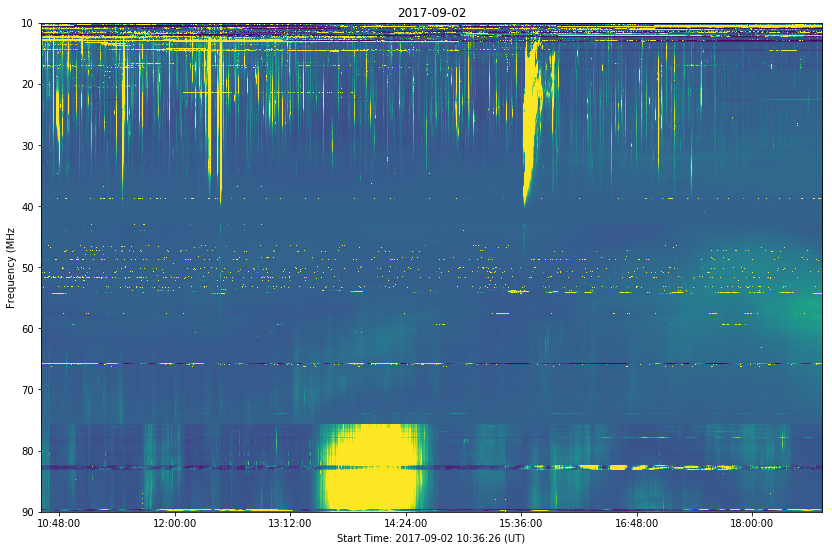

In [15]:
#
# PLOTTING THE DATA
#

plt.figure(1,figsize=(14,9))
# vmin, vmax can be changed
# frequency limits can be changed with more accurate limits using the sub-band to frequency calculator
imshow(data, vmin = 0.1, vmax= 3,aspect='auto',extent=(dates.date2num(start_time), dates.date2num(end_time), max_freq, min_freq))
# specify axis properties
ax = plt.gca()
ax.xaxis_date()
ax.xaxis.set_major_locator(dates.MinuteLocator())
# specify the time format for x-axis
ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%M:%S'))
# specify number of axis labels
ax.xaxis.set_major_locator( MaxNLocator(nbins = 8) )
# save the plot as png
plt.xlabel('Start Time: '  + str(start_time) + ' (UT)')
plt.ylabel('Frequency (MHz')
plt.title(str(start_time)[0:10])
plt.savefig(str(start_time)[0:10]+'_dynamic_spectrum.png')
#show the plot
plt.show()

The above plot shows the dynamic spectrum of the sun from 10:48-18:00 over the frequency range 10-90 MHz. An important point to note is that the frequency range can vary depending on the subbands used in an observation.